Question 1

In [335]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

a.

In [336]:
airfares_df = pd.read_csv("C:/Users/layas/OneDrive/Desktop/Airfares.csv")
airfares_df.head()

,S_CODE,S_CITY,E_CODE,E_CITY,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
0,*,Dallas/Fort Worth TX,*,Amarillo TX,1.00,3,No,Yes,5291.99,28637.0,21112.0,3036732,205711,Free,Free,312,7864,64.11
1,*,Atlanta GA,*,Baltimore/Wash Intl MD,1.06,3,No,No,5419.16,26993.0,29838.0,3532657,7145897,Free,Free,576,8820,174.47
2,*,Boston MA,*,Baltimore/Wash Intl MD,1.06,3,No,No,9185.28,30124.0,29838.0,5787293,7145897,Free,Free,364,6452,207.76
3,ORD,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Controlled,Free,612,25144,85.47
4,MDW,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Free,Free,612,25144,85.47


b.

In [337]:
print(airfares_df.dtypes)

num_categorical_variables = sum(airfares_df.dtypes == 'object')
num_numerical_variables = sum(airfares_df.dtypes.isin(['int64', 'float64']))
print("Number of categorical variables:", num_categorical_variables)
print("Number of numerical variables:", num_numerical_variables)


S_CODE       object
S_CITY       object
E_CODE       object
E_CITY       object
COUPON      float64
NEW           int64
VACATION     object
SW           object
HI          float64
S_INCOME    float64
E_INCOME    float64
S_POP         int64
E_POP         int64
SLOT         object
GATE         object
DISTANCE      int64
PAX           int64
FARE        float64
dtype: object
Number of categorical variables: 8
Number of numerical variables: 5


c.

In [338]:

unique_cities = pd.concat([airfares_df['E_CITY'], airfares_df['S_CITY']]).nunique()
print("No. of unique cities:", unique_cities)

num_vacation_trips = sum(airfares_df['VACATION'] == 'Yes')
print("No. of vacation trips:", num_vacation_trips)


No. of unique cities: 76
No. of vacation trips: 170


In [339]:
airfares_df.describe()

,COUPON,NEW,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,FARE
count,638.000000,638.000000,638.000000,638.000000,638.000000,6.380000e+02,6.380000e+02,638.000000,638.000000,638.000000
mean,1.202335,2.753918,4442.141129,27759.860502,27663.727273,4.557004e+06,3.194503e+06,975.653605,12782.214734,160.876677
std,0.203821,0.760448,1724.267051,3596.207837,4611.325018,3.010985e+06,2.735604e+06,646.242403,13202.228860,76.022436
min,1.000000,0.000000,1230.480000,14600.000000,14600.000000,2.983800e+04,1.117450e+05,114.000000,1504.000000,42.470000
25%,1.040000,3.000000,3090.137500,24706.000000,23903.000000,1.862106e+06,1.228816e+06,455.000000,5328.500000,106.290000
50%,1.150000,3.000000,4208.185000,28637.000000,26409.000000,3.532657e+06,2.195215e+06,850.000000,7792.000000,144.600000
75%,1.297500,3.000000,5480.575000,29693.500000,31981.000000,7.830332e+06,4.549784e+06,1306.250000,14090.500000,209.350000
max,1.940000,3.000000,10000.000000,38813.000000,38813.000000,9.056076e+06,9.056076e+06,2764.000000,73892.000000,402.020000


d.

              FARE  DISTANCE    COUPON        HI  S_INCOME  E_INCOME  \
FARE      1.000000  0.670016  0.496537  0.025195  0.209135  0.326092   
DISTANCE  0.670016  1.000000  0.746805 -0.312375  0.028153  0.176531   
COUPON    0.496537  0.746805  1.000000 -0.347252 -0.088403  0.046889   
HI        0.025195 -0.312375 -0.347252  1.000000 -0.027382  0.082393   
S_INCOME  0.209135  0.028153 -0.088403 -0.027382  1.000000 -0.138864   
E_INCOME  0.326092  0.176531  0.046889  0.082393 -0.138864  1.000000   
S_POP     0.145097  0.018437 -0.107763 -0.172495  0.517187 -0.144059   
E_POP     0.285043  0.115640  0.094970 -0.062456 -0.272280  0.458418   

             S_POP     E_POP  
FARE      0.145097  0.285043  
DISTANCE  0.018437  0.115640  
COUPON   -0.107763  0.094970  
HI       -0.172495 -0.062456  
S_INCOME  0.517187 -0.272280  
E_INCOME -0.144059  0.458418  
S_POP     1.000000 -0.280143  
E_POP    -0.280143  1.000000  


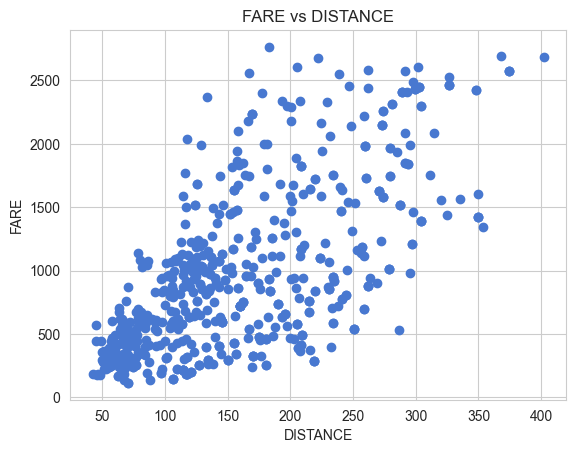

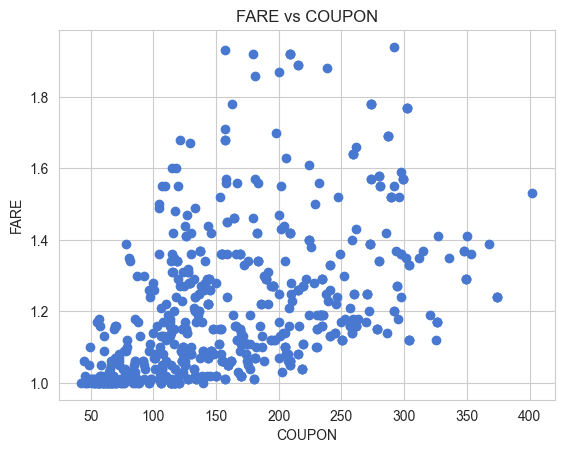

In [340]:
columns_for_correlation = ['FARE', 'DISTANCE', 'COUPON', 'HI', 'S_INCOME', 'E_INCOME', 'S_POP', 'E_POP']
correlation_table = airfares_df[columns_for_correlation].corr()
print(correlation_table)

# Scatter plot for FARE vs DISTANCE
plt.scatter(airfares_df['FARE'], airfares_df['DISTANCE'])
plt.title('FARE vs DISTANCE')
plt.xlabel('DISTANCE')
plt.ylabel('FARE')
plt.show()

# Scatter plot for FARE vs COUPON
plt.scatter(airfares_df['FARE'], airfares_df['COUPON'])
plt.title('FARE vs COUPON')
plt.xlabel('COUPON')
plt.ylabel('FARE')
plt.show()

# Repeat the scatter plot for other predictors as well


From the correlations found and the scatter plots:
DISTANCE has the strongest correlation with FARE, measuring 0.670016, showing a strong positive linear relationship. This means that the fare rises in proportion to the distance traveled.
COUPON has a positive connection with FARE of 0.496537, but not as strong as DISTANCE.
The remaining predictors (HI, S_INCOME, and E_INCOME) have lesser relationships with FARE.

Conclusion:
Based on the data presented, DISTANCE should be the strongest predictor of FARE in comparison to other factors.

In [341]:
category = ['VACATION', 'SW', 'SLOT', 'GATE']

for column in category:
    category_counts = airfares_df[column].value_counts(normalize=True) * 100
    print(f"Percentage of flights in each category for {column}: \n{category_counts}\n")


Percentage of flights in each category for VACATION: 
VACATION
No     73.354232
Yes    26.645768
Name: proportion, dtype: float64

Percentage of flights in each category for SW: 
SW
No     69.592476
Yes    30.407524
Name: proportion, dtype: float64

Percentage of flights in each category for SLOT: 
SLOT
Free          71.473354
Controlled    28.526646
Name: proportion, dtype: float64

Percentage of flights in each category for GATE: 
GATE
Free           80.564263
Constrained    19.435737
Name: proportion, dtype: float64



In [342]:

for column in category:
    pivot_table = airfares_df.pivot_table(values='FARE', index=column, aggfunc='mean')
    print(f"Average fare in each category for {column}: \n{pivot_table}\n")

Average fare in each category for VACATION: 
                FARE
VACATION            
No        173.552500
Yes       125.980882

Average fare in each category for SW: 
           FARE
SW             
No   188.182793
Yes   98.382268

Average fare in each category for SLOT: 
                  FARE
SLOT                  
Controlled  186.059396
Free        150.825680

Average fare in each category for GATE: 
                   FARE
GATE                   
Constrained  193.129032
Free         153.095953



f.

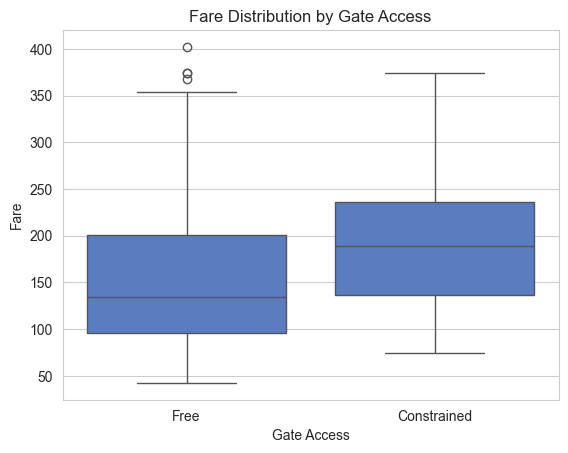

In [343]:
sns.boxplot(x='GATE', y='FARE', data=airfares_df)
plt.title('Fare Distribution by Gate Access')
plt.xlabel('Gate Access')
plt.ylabel('Fare')
plt.show()

We can see that there is very little fare when the gate is free and greater fare when the gate is confined. There are some outliers when the gate is open. When the gate is open, the average fare is roughly 140, whereas when it is closed, it is approximately 180.
There is a $40 rise as there are more individuals wishing to fly when gates are busy, resulting in fewer available gates, allowing airlines to charge more.

Potential implications for fare pricing -
Since tickets are higher when gates are constricted, airlines can use dynamic pricing models to raise prices during busy periods or when gate availability is limited. 


In [344]:
print(airfares_df.columns)

Index(['S_CODE', 'S_CITY', 'E_CODE', 'E_CITY', 'COUPON', 'NEW', 'VACATION',
       'SW', 'HI', 'S_INCOME', 'E_INCOME', 'S_POP', 'E_POP', 'SLOT', 'GATE',
       'DISTANCE', 'PAX', 'FARE'],
      dtype='object')


In [345]:
end_city = airfares_df['E_CITY'].unique()
start_city = airfares_df['S_CITY'].unique()

total_connected_cities = set(start_city).union(set(end_city))
total_connected_cities = len(total_connected_cities)

print(f"Number of states connected by the airports: {total_connected_cities}")


Number of states connected by the airports: 76


In [346]:

airfares_df['ROUTE'] = airfares_df['S_CITY'] + ' -> ' + airfares_df['E_CITY']

route_counts = airfares_df['ROUTE'].value_counts()

top_5_routes = route_counts.head(5)

print("Top 5 busiest routes:")
print(top_5_routes)


Top 5 busiest routes:
ROUTE
New York/Newark     NY -> Washington          DC    6
Chicago             IL -> New York/Newark     NY    6
New York/Newark     NY -> Pittsburgh          PA    4
Chicago             IL -> Washington          DC    4
Albuquerque         NM -> New York/Newark     NY    3
Name: count, dtype: int64


Question 2

In [347]:
df = pd.read_csv("C:/Users/layas/OneDrive/Desktop/Admission_Predict.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,yes,0.92
1,2,324,107,4,4.0,4.5,8.87,yes,0.76
2,3,316,104,3,3.0,3.5,8.00,yes,0.72
3,4,322,110,3,3.5,2.5,8.67,yes,0.80
4,5,314,103,2,2.0,3.0,8.21,no,0.65


a.

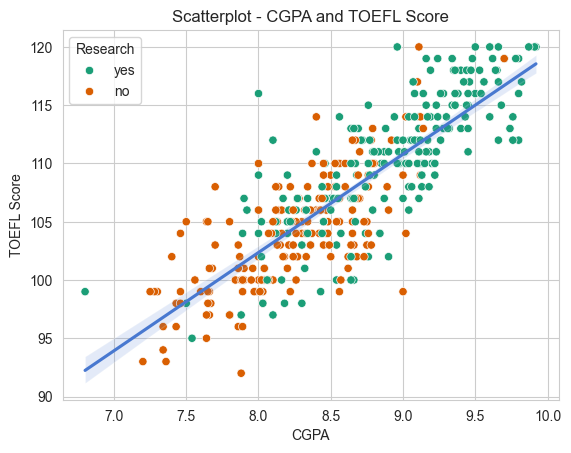

In [348]:

sns.scatterplot(x='CGPA', y='TOEFL Score', data=df , hue='Research', palette='Dark2')

sns.regplot(x='CGPA', y='TOEFL Score', data=df, scatter=False) 

plt.title('Scatterplot - CGPA and TOEFL Score')
plt.xlabel('CGPA')
plt.ylabel('TOEFL Score')
plt.show()

From the scatter plot, we observe a positive relationship between CGPA and TOEFL scores. As CGPA increases, TOEFL scores also tend to rise. Additionally, it is evident that most students with higher CGPAs are involved in research. This suggests that engaging in research work may contribute to achieving a higher CGPA.

b.

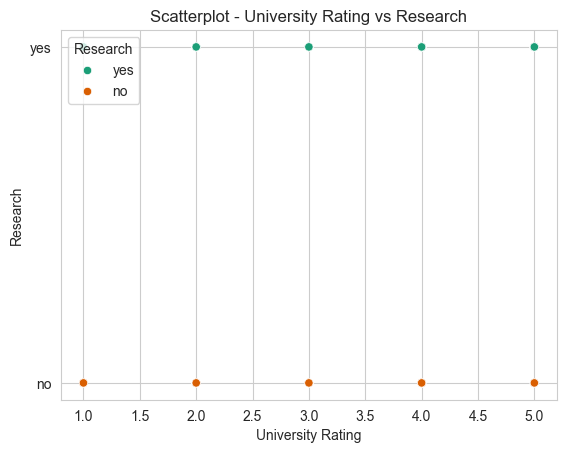

In [349]:
sns.scatterplot(x='University Rating', y='Research', data=df , hue='Research', palette='Dark2')

plt.title('Scatterplot - University Rating vs Research')
plt.xlabel('University Rating')
plt.ylabel('Research')
plt.legend(title='Research', loc='upper left')
plt.show()

Regarding why this scatterplot may not be useful:
The "Research" variable looks to be binary (Yes or No). In a scatterplot, where each point reflects a distinct combination of University Rating and Research, there may be little fluctuation to see. The points would most likely cluster at two distinct horizontal levels making it difficult to identify any patterns or links.

Stacked bar chart is an appropriate chart type.
A stacked bar chart would be more suited to demonstrating the relationship between University Rating and Research. This chart type displays the distribution of "Research: Yes" and "Research: No" across each University Rating category.

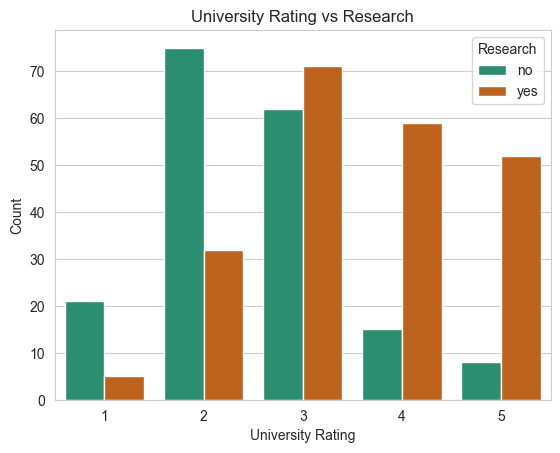

In [350]:
sns.countplot(x='University Rating', hue='Research', data=df, palette='Dark2')

plt.title('University Rating vs Research')
plt.xlabel('University Rating')
plt.ylabel('Count')
plt.show()

c.

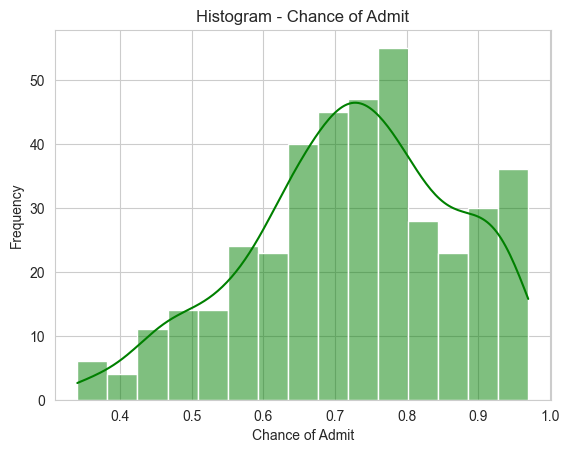

In [351]:
# Histogram
sns.histplot(df["Chance of Admit "], bins=15, color='g', kde='True')
plt.title('Histogram - Chance of Admit')
plt.xlabel('Chance of Admit')
plt.ylabel('Frequency')
plt.show()


Histogram for 'Chance of Admit':
   - The histogram is plotted with 15 bins, a kernel density estimate (kde) for smoothness.
   - The figure provides insights into the frequency distribution of 'Chance of Admit' values, which help to comprehend the overall pattern and concentration of admission possibilities.
   - The histogram shows the distribution of 'Chance of Admit,' revealing potential patterns in admission rates.


Text(0.5, 0, 'Chance of Admit')

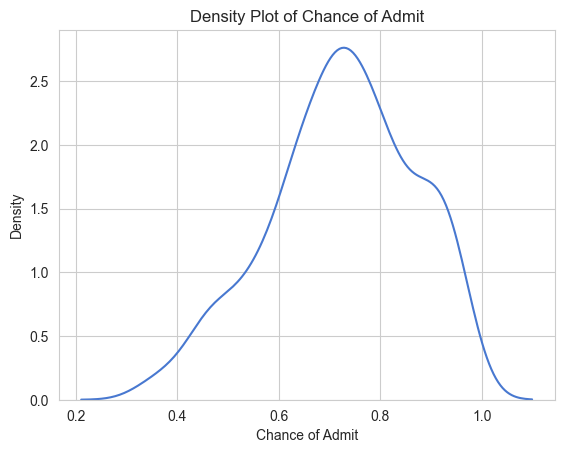

In [352]:
sns.kdeplot(df['Chance of Admit '])
plt.title('Density Plot of Chance of Admit')
plt.xlabel('Chance of Admit')

In [353]:
summary_stats = df['Chance of Admit '].describe()
print(summary_stats)


count    400.000000
mean       0.724350
std        0.142609
min        0.340000
25%        0.640000
50%        0.730000
75%        0.830000
max        0.970000
Name: Chance of Admit , dtype: float64


The visualization and statistical summary show that 'Chance of Admit' is somewhat right-skewed, with most values falling between 0.64 and 0.83. This implies that, while the majority of candidates have a moderate to high likelihood of acceptance, there are fewer with extremely low or very high odds.

d.

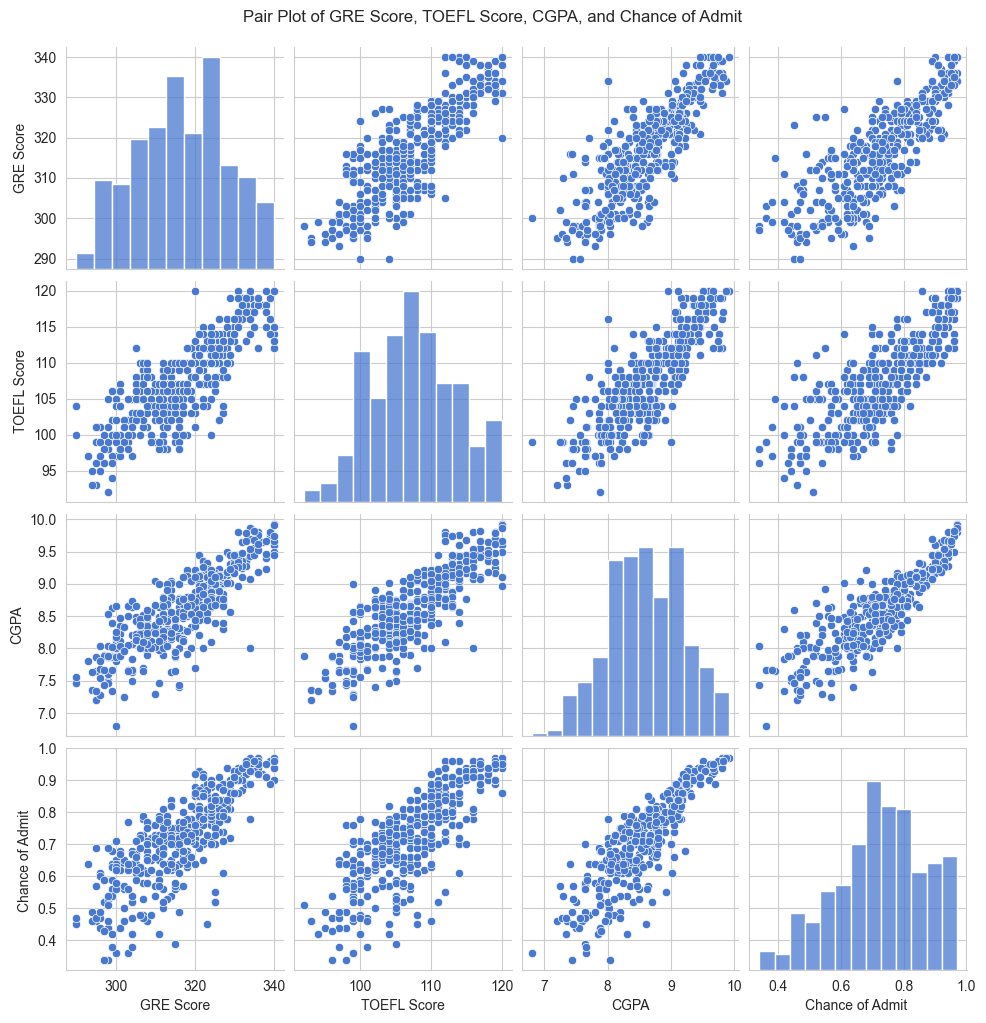

In [354]:
sns.pairplot(df, vars=['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit '])

plt.suptitle('Pair Plot of GRE Score, TOEFL Score, CGPA, and Chance of Admit', y=1.02)
plt.show()

All plot combinations between GRE, CGPA, TOEFL and Chance of Admit all have a strong positive association with one another, which means that if one of these factors is high, then the other component that corresponds to it is also likely to be high.

Question 3

In [355]:
forestfire_df = pd.read_csv("C:/Users/layas/OneDrive/Desktop/forestfires.csv")
forestfire_df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


C:\Users\layas\AppData\Local\Temp\ipykernel_20652\2916909265.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = forestfire_df.pivot_table(index='month', columns='day', aggfunc='size', fill_value=0)


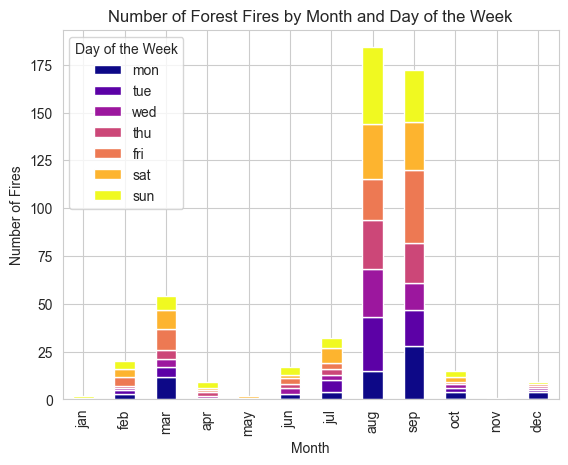

In [356]:

forestfire_df['month'] = pd.Categorical(forestfire_df['month'], categories=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], ordered=True)

forestfire_df['day'] = pd.Categorical(forestfire_df['day'], categories=['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'], ordered=True)

pivot_table = forestfire_df.pivot_table(index='month', columns='day', aggfunc='size', fill_value=0)

pivot_table.plot(kind='bar', stacked=True, colormap='plasma')
plt.title('Number of Forest Fires by Month and Day of the Week')
plt.xlabel('Month')
plt.ylabel('Number of Fires')
plt.legend(title='Day of the Week', loc='upper left')
plt.show()


Seasonal Patterns:
The plot indicates that forest fires are more frequent in certain months, suggesting a seasonal pattern. For instance, higher incidences during summer months (August,September) likely result from increased temperatures and human activities.

Complexity:
Stacked bar charts can become cluttered with many categories (days of the week) and data points (months), making interpretation difficult. The challenge of distinguishing between multiple segments and colors can obscure important trends.

Alternative: - Heatmaps can be more effective for this data as they
    - Provide clear visual patterns using color intensity to represent the number of fires.
    - Allow easy comparison across months and days without clutter.
    - Simplify data interpretation by presenting it in a single, cohesive view.

C:\Users\layas\AppData\Local\Temp\ipykernel_20652\3937076504.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = forestfire_df.pivot_table(values='FFMC', index='month', columns='day', aggfunc='sum')


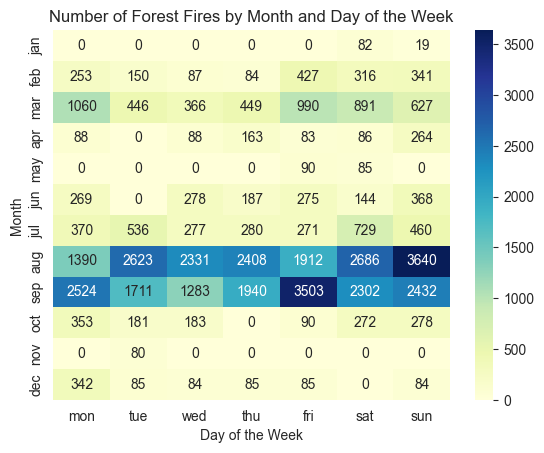

In [357]:
heatmap_data = forestfire_df.pivot_table(values='FFMC', index='month', columns='day', aggfunc='sum')

sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='1.0f')
plt.title('Number of Forest Fires by Month and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Month')
plt.show()


b.

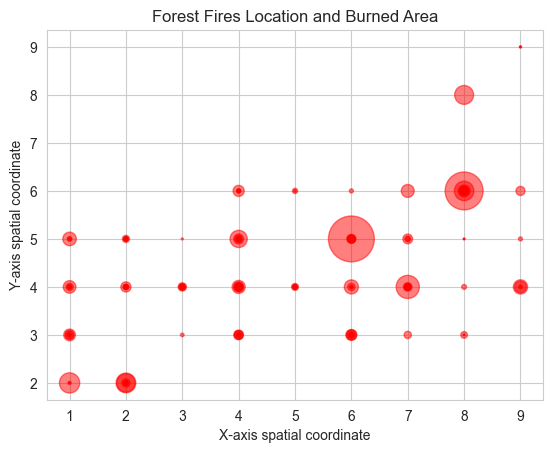

In [358]:
plt.scatter(forestfire_df['X'], forestfire_df['Y'], s=forestfire_df['area'], alpha=0.5, c='red')
plt.title('Forest Fires Location and Burned Area')
plt.xlabel('X-axis spatial coordinate')
plt.ylabel('Y-axis spatial coordinate')
plt.grid(True)
plt.show()

c.

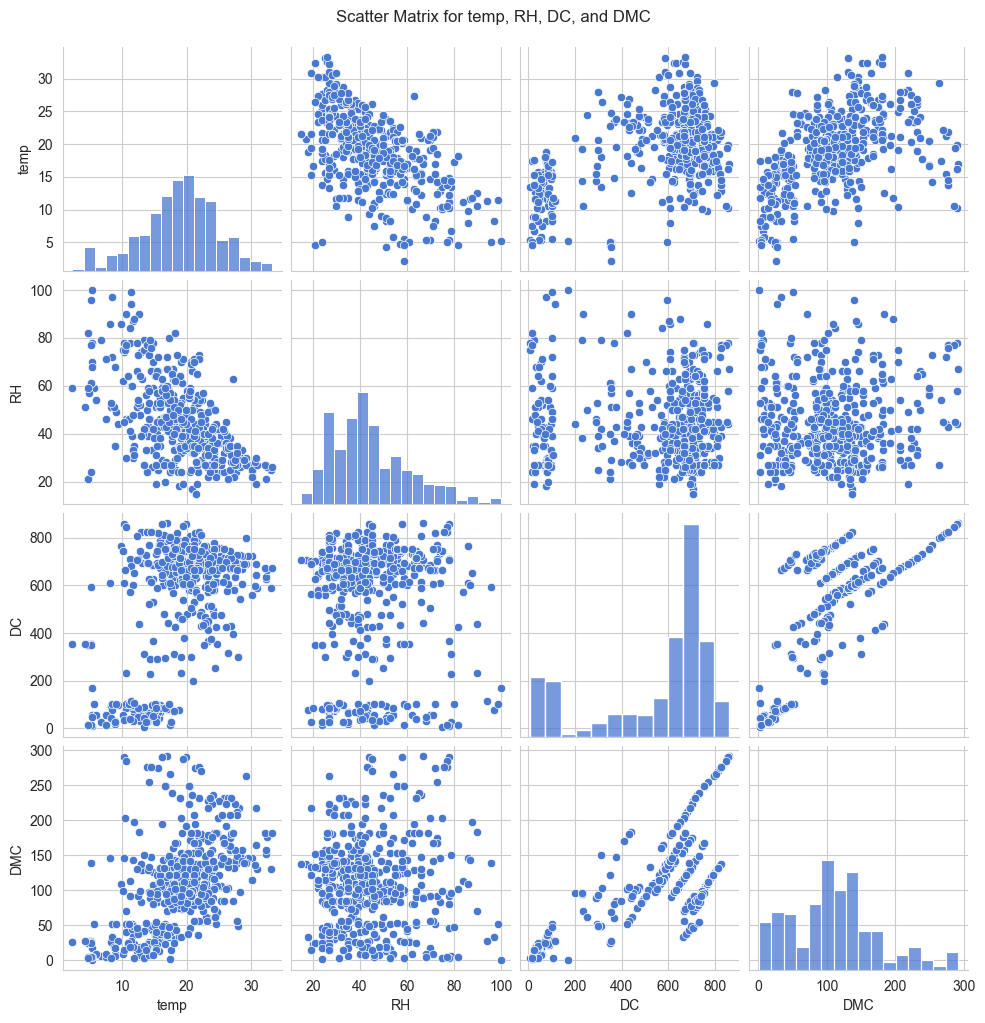

In [359]:
col = ['temp', 'RH', 'DC', 'DMC']
scatter_matrix = sns.pairplot(forestfire_df[col])
plt.suptitle('Scatter Matrix for temp, RH, DC, and DMC', y=1.02)
plt.show()

Scatter Plots: Each subplot in the matrix depicts a scatter plot of two variables. 
The diagonal elements represent the distribution of particular variables.

Correlation: Scatter plots depict the correlations between pairs of variables. 
Look for trends in point distribution. Points forming a linear pattern suggest a probable association between variables.

Interpretation:

Positive Slope: Indicates a positive correlation. (DC vs DMC)

Negative Slope: Indicates a negative correlation. (temp vs RH)

No Clear Pattern: Suggests a weak or no correlation. (All others)

d.

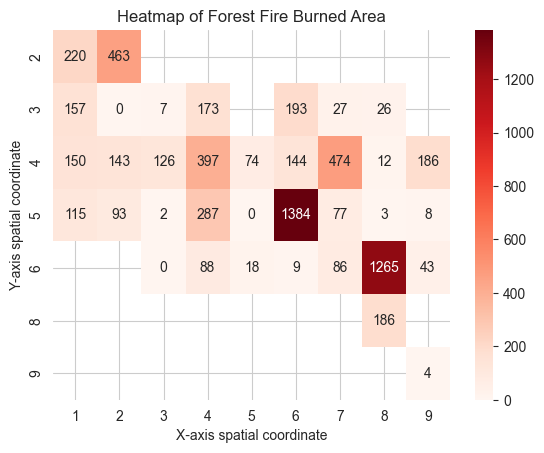

In [360]:

heatmap_data = forestfire_df.pivot_table(index='Y', columns='X', values='area', aggfunc='sum')

sns.heatmap(heatmap_data, cmap='Reds', annot=True, fmt="1.0f")
plt.title('Heatmap of Forest Fire Burned Area')
plt.xlabel('X-axis spatial coordinate')
plt.ylabel('Y-axis spatial coordinate')
plt.show()


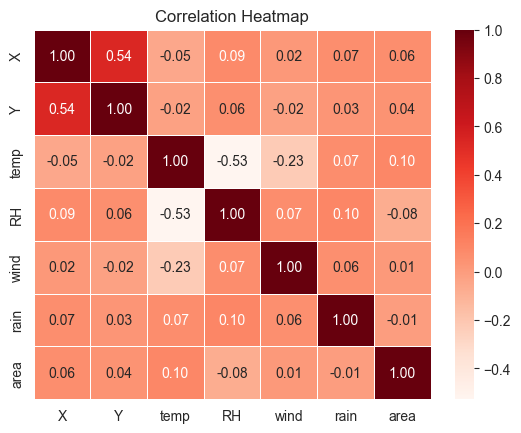

In [362]:
selected_columns = ['X', 'Y', 'temp', 'RH', 'wind', 'rain', 'area']

correlation_matrix = forestfire_df[selected_columns].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Extra Credits

Q1.
a. Probability of meeting the deadline:

(probability of project A) * (probability of meeting deadline on A) + 
(probability of project B) * (probability of meeting deadline on B) + 
(probability of project C) * (probability of meeting deadline on C)
= (0.5 * 0.8) + (0.3 * 0.7) + (0.2 * 0.6) 
= 0.4 + 0.21 + 0.12
= 0.73
So, the probability that a randomly chosen employee meets their deadline is 73%.


b. Probability of project B given meeting the deadline:

P(B | meeting deadline) 
= (P(B) * P(meeting deadline on B)) / P(meeting deadline)
= (0.3 * 0.7) / 0.73 
= 0.287
Therefore, the probability that an employee is working on project B given they meet the deadline is approximately 28.7%.


c. Probability of project C given not meeting the deadline:

P(not meeting deadline) = 1 - P(meeting deadline) = 1 - 0.73 = 0.27

P(C | not meeting deadline) 
= (P(C) * P(not meeting deadline on C)) / P(not meeting deadline)
= P(not meeting deadline on C) 
= 1 - P(meeting deadline on C) 
= 1 - 0.6 
= 0.4 

P(C | not meeting deadline) 
= (0.2 * 0.4) / 0.27 
= 0.296 

Therefore, the probability that an employee is working on project C given they did not meet the deadline is approximately 29.6%.


Q2.

a. Approximately 50% of the smartphones have a battery life between 9 and 11 hours.

b. We need the z-scores (z1 and z2) based on the desired range (9-11 hours) and the calculated σ_mean (0.53 hours) to find the probability using a z-table or CDF function.

c. We need the z-scores (z1 and z2) based on the desired range (9-11 hours) and the calculated σ_mean (0.53 hours) to find the probability using a z-table or CDF function.

Q3.

Vegetarians seem to have a higher proportion of tea drinkers (480) compared to coffee drinkers (720).
Non-vegetarians seem to have a higher proportion of coffee drinkers (940) compared to tea drinkers (360).
This suggests a potential association between dietary preference and beverage preference. People who identify as vegetarian might be more inclined towards tea, while non-vegetarians might lean more towards coffee.

Conclusion:
Based on the observed data, there is evidence to suggest that dietary and beverage preferences may not be independent

Q4.

Noise and outliers are both imperfections in data, but they differ in their characteristics and significance.

a. Is noise ever interesting or desirable? What about outliers?
 Noise:  No, typically not. Noise introduces uncertainty and makes it harder to see the underlying trends in data. However, understanding the nature of noise can be helpful in data cleaning or improving measurement techniques.
 Outliers: Yes, sometimes. Outliers can be interesting if they represent genuine phenomena. They can sometimes reveal important insights or exceptions to the general pattern. However, they can also be misleading if they stem from errors.

b. Can noise objects also be outliers?
 No. Noise typically refers to small fluctuations around the average value, while outliers are much further away from the center of the data.

c. Are noise objects always considered outliers?
 No. Noise refers to relatively small and inconsequential variations, whereas outliers are significant deviations that can potentially distort analysis.

d. Are outliers always considered noise objects?
 No. Outliers can be valid data points that deviate from the majority due to genuine reasons. Noise, on the other hand, generally represents minor errors or random fluctuations.

e. Can noise transform a typical value into an unusual one, or the other way around?
 Yes. Noise can cause a typical value to appear unusual if the random fluctuations are large enough in a particular instance. Conversely, noise can make an outlier seem less extreme if it masks the outlier.